# analyzation of ✨recent protests✨in the us
by daniel cui
<hr>
Datasource can be found at https://countlove.org/faq.html under "Can I use your protest data for...?" <br>
Thanks to Count Love for the dataset! <br>
Data spans from January 15th, 2017, to November 15th, 2020
<br>

## pt1: importing and cleaning data source
I'm taking the data source and performing some very basic analyzation to make new columns based on the values of the existing columns. This will make subsetting and working with the data much easier down the line. 
<hr>

In [1]:
# import yummy packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Original Dataset, only parsing the Date column for convenience
data = pd.read_csv("protests.csv", parse_dates=["Date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36946 entries, 0 to 36945
Data columns (total 8 columns):
Date                        36946 non-null datetime64[ns]
Location                    36946 non-null object
Attendees                   22442 non-null float64
Event (legacy; see tags)    36946 non-null object
Tags                        36946 non-null object
Curated                     36946 non-null object
Source                      36946 non-null object
Total Articles              36946 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 2.3+ MB


0    http://www.capitalgazette.com/news/ph-ac-cn-ac...
1    http://www.johnsoncitypress.com/Local/2017/01/...
2    http://wishtv.com/2017/01/16/nature-groups-pro...
3    http://www.cincinnati.com/picture-gallery/news...
4    http://www.realhartford.org/2017/01/19/reprodu...
Name: Source, dtype: object

In [3]:
# Create a States column (Last 2 letters of Location column)
data["State"] = data.apply(lambda row: row.Location[-2:].upper() if row.Location[-4] == "," else None, axis=1)

# There are some null values
noState = data[data["State"].isnull()]
print(noState["Location"])
# One protest from Mexico, and one in Space! However, the other one is missing a state. After searching, the protest happened in Indiana. 
data.loc[27115, "State"] = "IN"
# There are also some typos in the Location column, but they aren't too important. 
# (State initials not being capitalized, like "Wa" instead of "WA". I fixed them in the States column with .upper() anyways)

1105                      Ciudad Juarez, Mexico
2298                                      Space
27115    La Porte County Courthouse in La Porte
Name: Location, dtype: object


In [4]:
# Create a Event (General) column, based on the existing Event column (basically just remove the legacy)
data["Event (General)"] = data.apply(lambda row: row["Event (legacy; see tags)"].split('(')[0].strip(), axis=1)

In [5]:
# Create columns for analyzation of COVID-related protests
# COVID - If the row is related to the Coronavirus
data["COVID"] = data.apply(lambda row: True if "Coronavirus" in row.Tags else None, axis=1)
# COVID Reason - If the row IS related to Coronavirus, what is the protest further about?
data["COVID Reason"] = data.apply(lambda row: None if row["COVID"] == None else (
    "Education" if row["Event (General)"] == "Education" else (
    "Against hazardous conditions" if "Against hazardous conditions" in row["Tags"] else (
    "Against regulations" if ("Against regulation" in row["Tags"]) or ("Against pandemic intervention" in row["Tags"]) else "Other"))),
                  axis=1)

In [6]:
# Now that the data has been edited a bit, here's the final dataset that I'll be working with
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36946 entries, 0 to 36945
Data columns (total 12 columns):
Date                        36946 non-null datetime64[ns]
Location                    36946 non-null object
Attendees                   22442 non-null float64
Event (legacy; see tags)    36946 non-null object
Tags                        36946 non-null object
Curated                     36946 non-null object
Source                      36946 non-null object
Total Articles              36946 non-null int64
State                       36944 non-null object
Event (General)             36946 non-null object
COVID                       2038 non-null object
COVID Reason                2038 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 3.4+ MB


In [7]:
data.head()

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles,State,Event (General),COVID,COVID Reason
0,2017-01-15,"Bowie State University, Bowie, MD",1500.0,Healthcare,Healthcare; For Affordable Care Act,Yes,http://www.capitalgazette.com/news/ph-ac-cn-ac...,1,MD,Healthcare,None,None
1,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4,TN,Civil Rights,None,None
2,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1,IN,Environment,None,None
3,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1,OH,Other,None,None
4,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1,CT,Healthcare,None,None


In [8]:
data.tail()

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles,State,Event (General),COVID,COVID Reason
36941,2020-11-15,"Poway, CA",200.0,Executive,Executive; For 45th president; Voting,No,https://www.sandiegouniontribune.com/news/poli...,4,CA,Executive,None,None
36942,2020-11-15,"Rancho Mirage, CA",100.0,Executive,Executive; For 45th president; Voting,No,https://www.desertsun.com/story/news/2020/11/1...,1,CA,Executive,None,None
36943,2020-11-15,"Yucca Valley, CA",10.0,Executive,Executive; For 45th president; Voting,No,https://www.desertsun.com/story/news/2020/11/1...,1,CA,Executive,None,None
36944,2020-11-15,"Omaha, NE",35.0,Healthcare,Healthcare; Against pandemic intervention; Cor...,No,https://omaha.com/news/local/anti-mask-group-h...,1,NE,Healthcare,True,Against regulations
36945,2020-11-15,"Orem, UT",75.0,Healthcare,Healthcare; Against pandemic intervention; Cor...,No,https://www.ksl.com/article/50049406/individua...,2,UT,Healthcare,True,Against regulations


## Pt 2: analyzing overall picture
Analyzation of the big picture; how many protests, what kind of protests?
<hr>

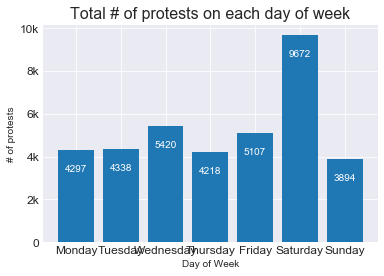

In [26]:
# Count of how many protests happened on which days of week
# Set up data
dataDOW = data["Date"].dt.dayofweek
DOW = [["Monday", 0], ["Tuesday", 0], ["Wednesday", 0], ["Thursday", 0], ["Friday", 0], ["Saturday", 0], ["Sunday", 0]]
# Add a count for each time a protest happens on a given day of the week
for i in dataDOW:
    DOW[i][1] += 1
# Turn into DataFrame to make it more compatible to plot
DOWdata = pd.DataFrame(DOW)
DOWdata.columns = ["DoW", "# Protests"]

# Plotting
plt.style.use("seaborn-darkgrid")
plt.bar(DOWdata["DoW"], DOWdata["# Protests"])
plt.title("Total # of protests on each day of week", fontsize=16)
plt.xlabel("Day of Week")
plt.xticks(fontsize=12)
plt.ylabel("# of protests")
plt.yticks(ticks=[0, 2000, 4000, 6000, 8000, 10000], labels=['0', '2k', '4k', '6k', '8k', '10k'], fontsize=12)
for i in range(len(DOW)):
    plt.text(i, DOW[i][1]-1000, DOW[i][1], ha='center', c='white')
plt.show()

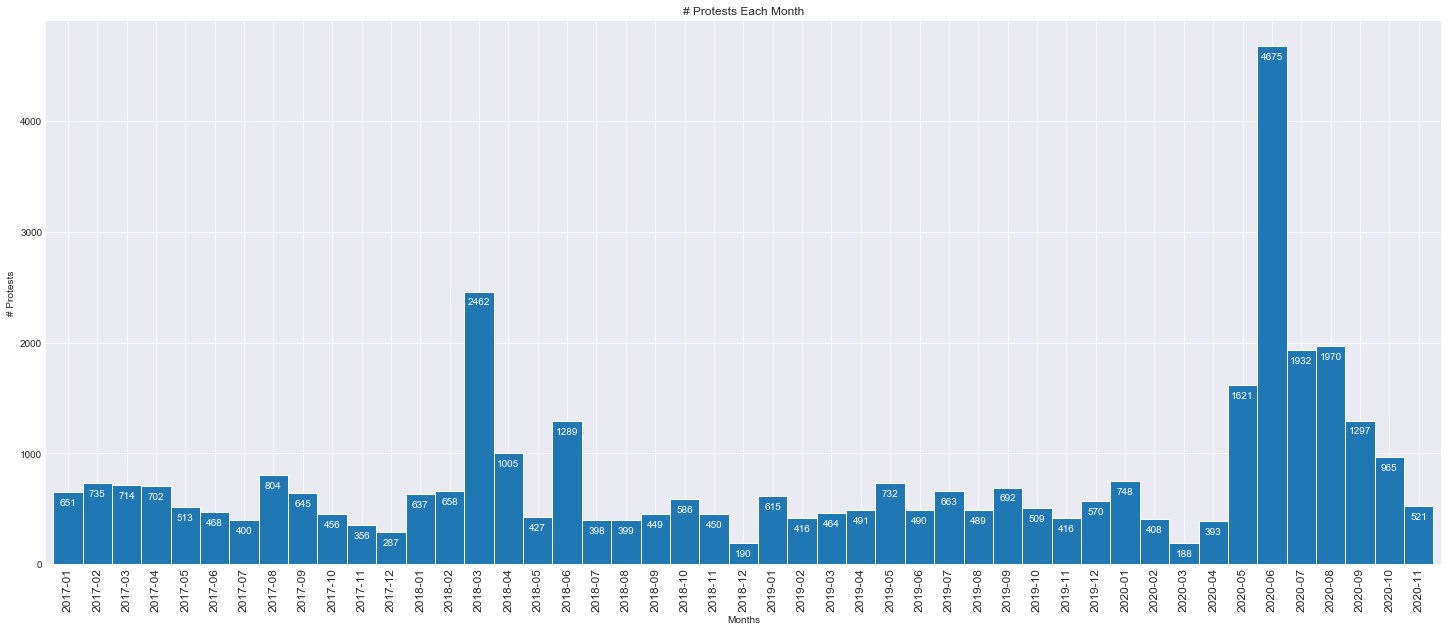

In [10]:
# Finding how many protests happened each month
pCount = data["Date"].groupby(data["Date"].dt.to_period("M")).count()

# Plotting
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
pCount.plot(kind='bar', width=1, edgecolor='white')
plt.title("# Protests Each Month")
plt.xlabel("Months")
plt.xticks(fontsize=12)
plt.ylabel("# Protests")
for i in range(len(pCount)):
    plt.text(i, pCount[i]-120, pCount[i], ha='center', c='white')

aiight cool<br>
we now see the total number of protests happening in each month<br><br>
but there are still so many questions :C<br>
what causes the spikes? how many, and what kind of protests happened?<br><br>
we have so many event categories, split it up further to make it even clearer >:C 

In [11]:
# Lists for Months and the total protest count for each month
monthList = [str(i) for i, v in pCount.iteritems()]
countList = [str(v) for i, v in pCount.iteritems()]
eventList = [str(i) for i in data["Event (General)"].unique()]

# For each event in Event (General), create a index dictionary and the dictionary for count for each month
eventIndex = {v:i for i, v in enumerate(eventList)}
indexDict = {i:[0] * len(monthList) for i in range(len(eventList))}

# Find month of event, add 1 count to the correlated event count field
for index, row in data.iterrows():
    monthStr = str(row["Date"])[:7]
    i = monthList.index(monthStr)
    j = eventIndex[row["Event (General)"]]
    indexDict[j][i] += 1

# Finally, creating the event dictionary, linking event to monthly count. 
eventDict = {i:indexDict[eventIndex[i]] for i in eventIndex}

# Making the final dictionary for the creation of the 2nd DataFrame table 
dataDict = {
    "Month": monthList,
    "Total Count": countList
}
for i in eventDict:
    dataDict[i] = eventDict[i]

# Creating the 2nd data table, d2
d2 = pd.DataFrame(dataDict)
d2.set_index("Month")
d2

,Month,Total Count,Healthcare,Civil Rights,Environment,Other,Executive,Racial Injustice,Education,Immigration,Legislative,Collective Bargaining,International Relations,Guns,Judicial
0,2017-01,651,3,438,8,3,32,2,1,163,1,0,0,0,0
1,2017-02,735,49,130,40,23,131,18,6,268,67,2,1,0,0
2,2017-03,714,76,129,45,139,165,27,20,74,14,16,3,6,0
3,2017-04,702,11,40,88,310,138,20,6,46,8,7,21,7,0
4,2017-05,513,78,23,27,103,28,42,33,133,5,29,7,5,0
5,2017-06,468,67,129,26,48,77,34,13,32,3,21,6,12,0
6,2017-07,400,113,42,21,84,37,31,14,26,10,12,6,4,0
7,2017-08,804,17,32,29,96,43,485,9,46,13,22,8,4,0
8,2017-09,645,19,30,24,105,17,157,17,237,4,29,2,4,0
9,2017-10,456,4,48,31,125,21,124,26,26,4,20,9,18,0


<Figure size 432x288 with 0 Axes>

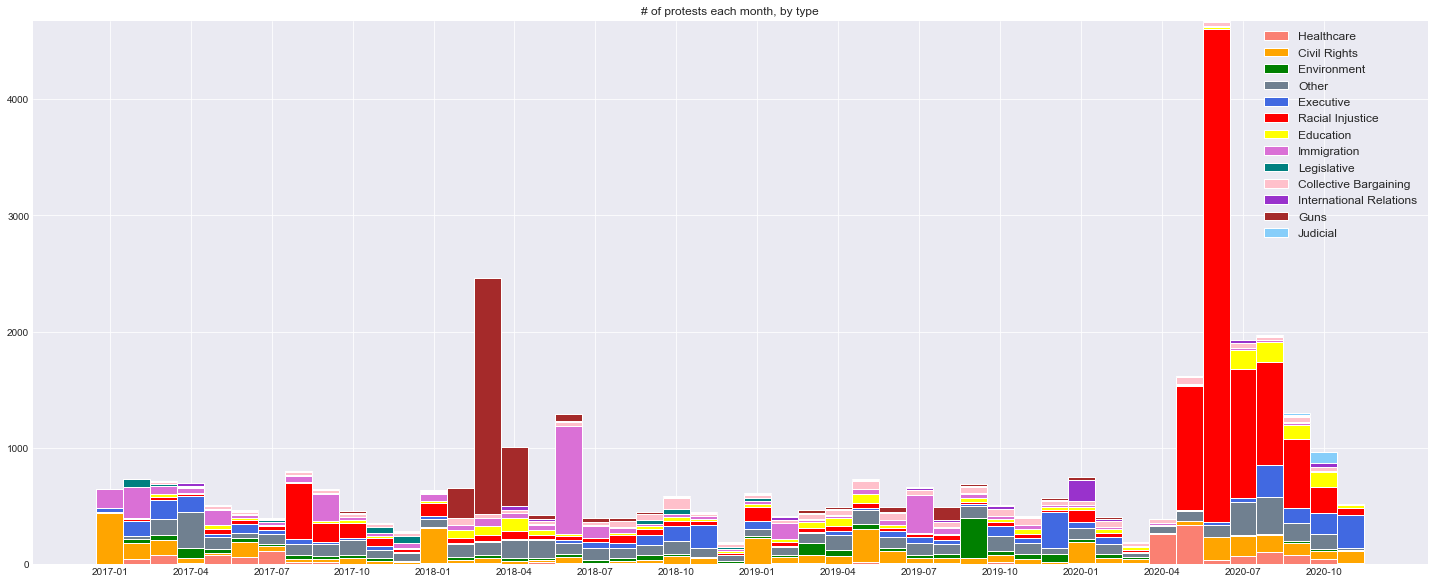

In [12]:
# Giving the graph more ✨color✨
eventColors = {
    "Healthcare":"salmon",
    "Civil Rights":"orange",
    "Environment":"green",
    "Other":"slategray",
    "Executive":"royalblue",
    "Racial Injustice":"red",
    "Education":"yellow",
    "Immigration":"orchid",
    "Legislative":"teal",
    "Collective Bargaining":"pink",
    "International Relations":"darkorchid",
    "Guns":"brown",
    "Judicial":"lightskyblue"
}

# Plotting
plt.clf()
fig, ax = plt.subplots()
botvals = pd.Series([0] * 47)

for i in range(len(eventList)):
    ax.bar(d2.index, d2[eventList[i]], bottom=botvals, 
           label=eventList[i], color=eventColors[eventList[i]],
           width=1, edgecolor='white')
    botvals += d2[eventList[i]]

ax.legend(fontsize=12)
fig.set_size_inches(25, 10)
plt.title("# of protests each month, by type")
plotxticks = [monthList[i * 3] for i in range(round(47/3))]
plt.xticks([i*3 for i in range(round(47/3))], labels=plotxticks)
plt.show()

In [13]:
#Some things jump out - March of 2018, June of 2020, for example
print("March of 2018 =============\n",
      d2[d2["Month"] == "2018-03"], 
      "\n\n") # Shows over 2000 protests in the "Guns" category
print("June of 2020 ==============\n",
      d2[d2["Month"] == "2020-06"],
     "\n") # Shows over 4200 protests in the "Racial Injustice" category (this should be obvious kekw)

March of 2018 =============
       Month Total Count  Healthcare  Civil Rights  Environment  Other  \
14  2018-03        2462           7            46           25    111   

    Executive  Racial Injustice  Education  Immigration  Legislative  \
14         14                49         75           68            6   

    Collective Bargaining  International Relations  Guns  Judicial  
14                     28                        2  2031         0   


June of 2020 ==============
       Month Total Count  Healthcare  Civil Rights  Environment  Other  \
41  2020-06        4675          38           195            0    104   

    Executive  Racial Injustice  Education  Immigration  Legislative  \
41         24              4246         11           14            1   

    Collective Bargaining  International Relations  Guns  Judicial  
41                     35                        3     4         0   



In [14]:
# Search in original dataframe
start = "2018-03-01"
end = "2018-03-31"
after = data["Date"] >= start
before = data["Date"] <= end
between = after & before
march2018 = data[between]
# Sort tags by most common tag
march2018.groupby("Tags").count()["Date"].sort_values(ascending=False)

Tags
Guns; For greater gun control; National Walkout Day    1312
Guns; For greater gun control; March for Our Lives      504
Guns; For greater gun control                           105
Guns; Against greater gun control; Counter protest       82
Immigration; For DACA                                    42
                                                       ... 
Healthcare; For greater awareness; Mental health          1
Healthcare; For greater funding                           1
Healthcare; For greater inclusion; Mental health          1
Healthcare; For local services                            1
Other; For worker rights; Transportation                  1
Name: Date, Length: 146, dtype: int64

aha, searching March of 2018 reveals national walkout day. Further investigation shows that all 1312 rows were on March 14th. This would explain the huge spike.<br><br>
The 504+105 other rows for gun control would also explain the spike: protests happen on other days of the month, when gun control is still a hot topic.<br><br>
The 82 Counter protest rows are interesting, this is the first time we see the protest/counter-protest relationship explicitly. <br><br>
what about june of 2020?

In [15]:
#same thing lol
start = "2020-06-01"
end = "2020-06-30"
after = data["Date"] >= start
before = data["Date"] <= end
between = after & before
june2020 = data[between]
june2020.groupby("Tags").count()["Date"].sort_values(ascending=False)

Tags
Civil Rights; For racial justice; For greater accountability; Police                                       3992
Civil Rights; For white supremacy; Counter protest                                                          133
Civil Rights; For racial justice                                                                             63
Civil Rights; For racial justice; Against Confederate symbol                                                 53
Other; For supporting police                                                                                 48
                                                                                                           ... 
Collective Bargaining; For unionization                                                                       1
Collective Bargaining; For unionization; For better compensation                                              1
Collective Bargaining; For worker rights; Against hazardous conditions; Coronavirus                

well, not explicitly stated, but its obviously for Black Lives Matter. <br><br>
~~kek 133 protests "For white supremacy" what a meme~~<br><br>
let's switch gears for a moment, let's look at the distribution of protests across the States

<Figure size 432x288 with 0 Axes>

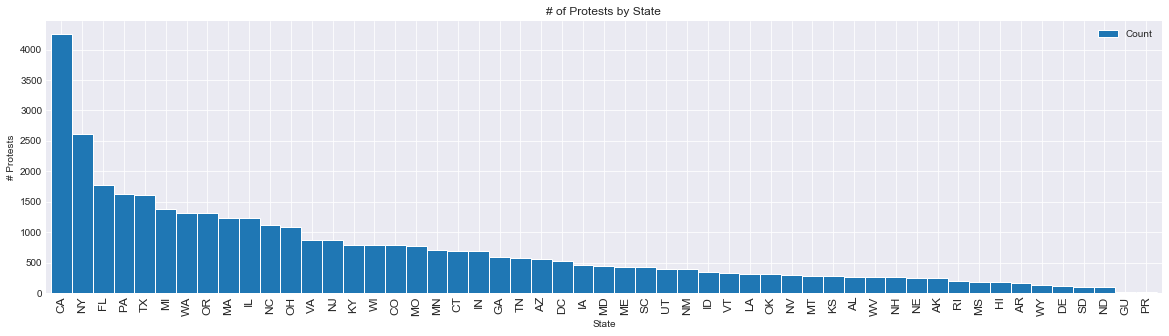

<Figure size 432x288 with 0 Axes>

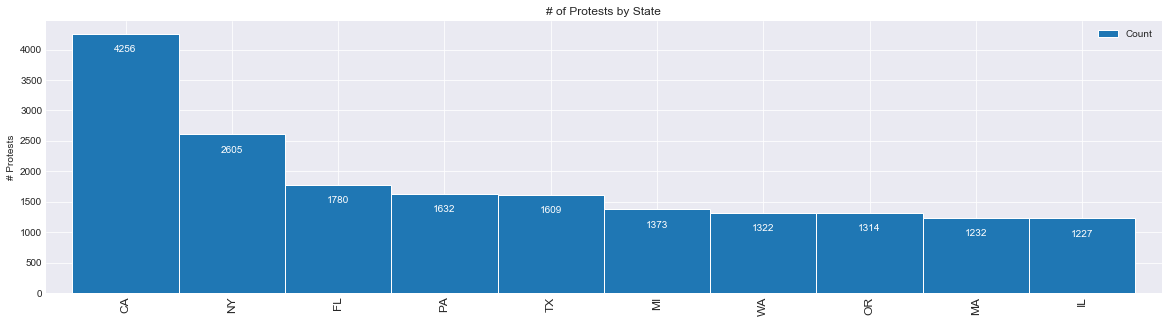

In [16]:
# Finding how many total protests happened in each state
plt.clf()
stateCount = pd.DataFrame(data.groupby("State").count()["Date"])
stateCount.columns = ["Count"]
# Plotting
stateCount.sort_values(by="Count", ascending=False).plot(use_index=True, kind='bar', width=1, edgecolor='white', figsize=[20, 5])
plt.title("# of Protests by State")
plt.ylabel("# Protests")
plt.ylim(0)
plt.xticks(fontsize=12)
plt.show()

# Showing all states a little unecessary, lets choose only top 10
plt.clf()
top10 = stateCount.sort_values(by="Count", ascending=False).head(10).reset_index()
# Plotting
top10.plot(kind='bar', width=1, edgecolor='white', figsize=[20, 5])
plt.title("# of Protests by State")
plt.ylabel("# Protests")
plt.ylim(0)
top10states = []
for i, v in top10.iterrows():
    top10states += [v["State"]]
plt.xticks(ticks=[i for i in range(10)], labels=top10states,fontsize=12)
for i, v in top10.iterrows():
    plt.text(i, v["Count"]-300, v["Count"], 
            ha='center', c='white')

<img src="top5.png" style='float:left;margin-right:15px'>
imean theres a slight correlation with population <br><br>
kinda becomes less promiment as you keep going down in population but ¯\_(ツ)_/¯ <br><br>
i'm sure there's more to protest count than just population, but this might be something to note <br> <br>
interpret that how you will

## pt3: analyzation of recent issues
in this section, I will take a closer look at the following recent topics: Black Lives Matter, COVID, and about the most recent election. 
<hr>

In [17]:
# first, let's look at BLM protests, since that was the largest spike in the dataset
# Create a BLM subtable
blmset = (data["Date"] >= "2020-05-25") & (data["Date"] <= "2020-07-31") & ((data["Event (General)"] == "Racial Injustice") | (data["Event (General)"] == "Other"))
blm = data[blmset]
blmCount = pd.DataFrame(blm["Date"].groupby(blm["Date"].dt.to_period("D")).count())
blmCount.columns = ["Count"]

# starting to construct a DataFrame for a stacked bar chart
blmEvent = ["Other", "Racial Injustice"]
blmDays = [str(i)[5:] for i, v in blmCount.iterrows()]
blmCountList = [str(v["Count"]) for i, v in blmCount.iterrows()]
blmEventIndex = {
    "Racial Injustice":0,
    "Other":1
}
blmIndex = {
    0:[0] * len(blmCountList),
    1:[0] * len(blmCountList)
}

for i, v in blm.iterrows():
    dayStr = str(v["Date"].strftime("%Y-%m-%d"))[5:]
    i = blmDays.index(dayStr)
    j = blmEventIndex[v["Event (General)"]]
    blmIndex[j][i] += 1

# Construction of final dictionary
blmDict = {
    "Days":blmDays,
    "Total Count":blmCountList
}
for i in blmEventIndex:
    blmDict[i] = blmIndex[blmEventIndex[i]]
# Creation of table
d3 = pd.DataFrame(blmDict)
d3

,Days,Total Count,Racial Injustice,Other
0,05-25,2,2,0
1,05-26,9,7,2
2,05-27,15,12,3
3,05-28,47,43,4
4,05-29,146,143,3
...,...,...,...,...
63,07-27,17,14,3
64,07-28,30,20,10
65,07-29,26,22,4
66,07-30,43,22,21


<Figure size 432x288 with 0 Axes>

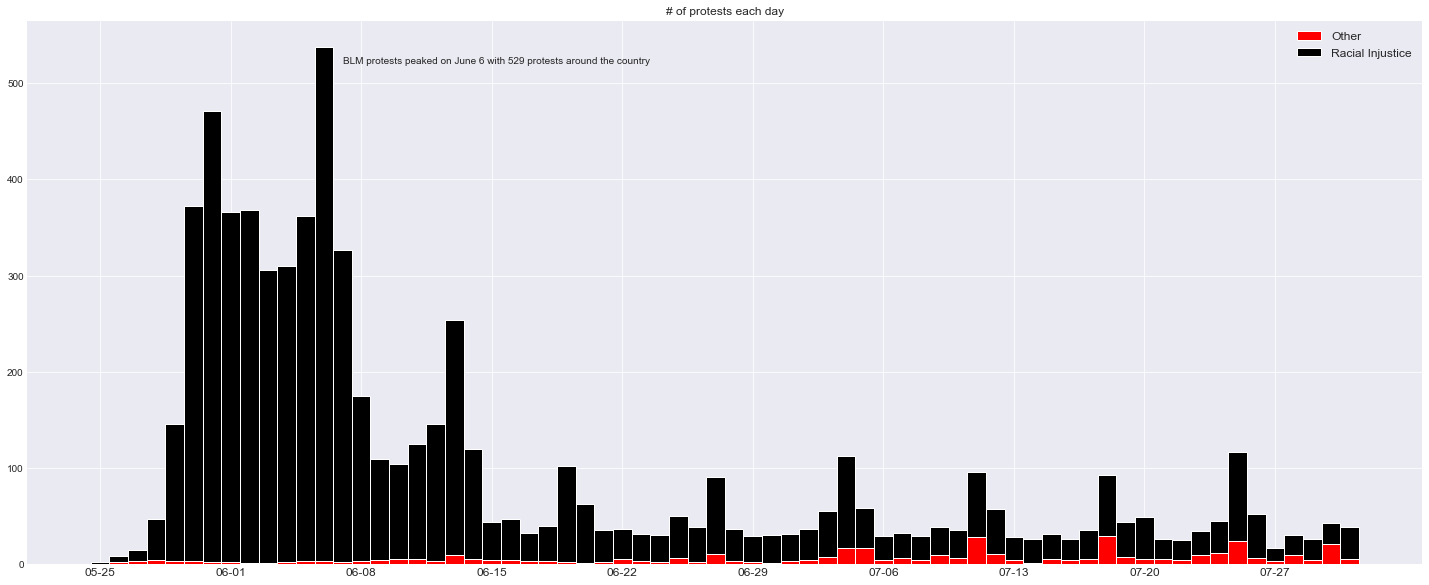

In [18]:
# Assigning each category colors
blmColors = {
    "Other":"red",
    "Racial Injustice":"black"
}

# Plotting
plt.clf()
fig, ax = plt.subplots()
botvals = pd.Series([0] * 68)

# Stacked Bar chart
for i in range(len(blmEvent)):
    ax.bar(d3.index, d3[blmEvent[i]], bottom=botvals, 
           label=blmEvent[i], color=blmColors[blmEvent[i]],
           width=1, edgecolor='white')
    botvals += d3[blmEvent[i]]

ax.legend(fontsize=12)
fig.set_size_inches(25, 10)
plt.title("# of protests each day")
plotxticks = [blmDays[i * 7] for i in range(round(68/7))]
plt.xticks([i*7 for i in range(round(68/7))], labels=plotxticks, fontsize=12)
plt.text(13, 520, "BLM protests peaked on June 6 with 529 protests around the country")
plt.show()

In [19]:
# Next, let's look at an ongoing issue and what kind of protests have happened in response: COVID-19
covidset = (data["Date"] >= "2020-03-10") & (data["COVID"])
covid = data[covidset]
# Turn the index into weeks except frick making it weeeks this took like 2 hours and I can't get the warning away >:C
startDay = pd.Timestamp("2020-03-10")
covid["Weeks Since"] = covid.apply(lambda row: np.floor((row["Date"] - startDay).days / 7).astype(int), axis=1)
covidCount = pd.DataFrame(covid["Date"].groupby(covid["Weeks Since"]).count())
covidCount.columns = ["Count"]

# Starting DataFrame construction
covidEvent = [i for i in covid["COVID Reason"].unique() if i != None]
covidWeeks = [i for i in range(covid["Weeks Since"].max() + 1)]
covidCountList = [str(v["Count"]) for i, v in covidCount.iterrows()]

covidEventIndex = {}
covidIndex = {}
for i in range(len(covidEvent)):
    covidEventIndex[covidEvent[i]] = i
    covidIndex[i] = [0] * len(covidCount)

for ind, v in covid.iterrows():
    since = math.floor((v["Date"] - startDay).days / 7)
    i = covidWeeks.index(since)
    j = covidEventIndex[v["COVID Reason"]]
    covidIndex[j][i] += 1

# Constructing Dictionary
covidDict = {
    "Weeks":covidWeeks,
    "Total Count":covidCountList
}
for i in covidEventIndex:
    covidDict[i] = covidIndex[covidEventIndex[i]]

# Creation of table
d4 = pd.DataFrame(covidDict)
d4

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Weeks,Total Count,Other,Education,Against hazardous conditions,Against regulations
0,0,10,3,2,4,1
1,1,5,3,0,2,0
2,2,17,6,0,11,0
3,3,33,7,0,26,0
4,4,41,10,0,26,5
5,5,146,20,1,32,93
6,6,127,28,2,19,78
7,7,191,40,1,43,107
8,8,84,15,0,16,53
9,9,98,29,0,14,55


<Figure size 432x288 with 0 Axes>

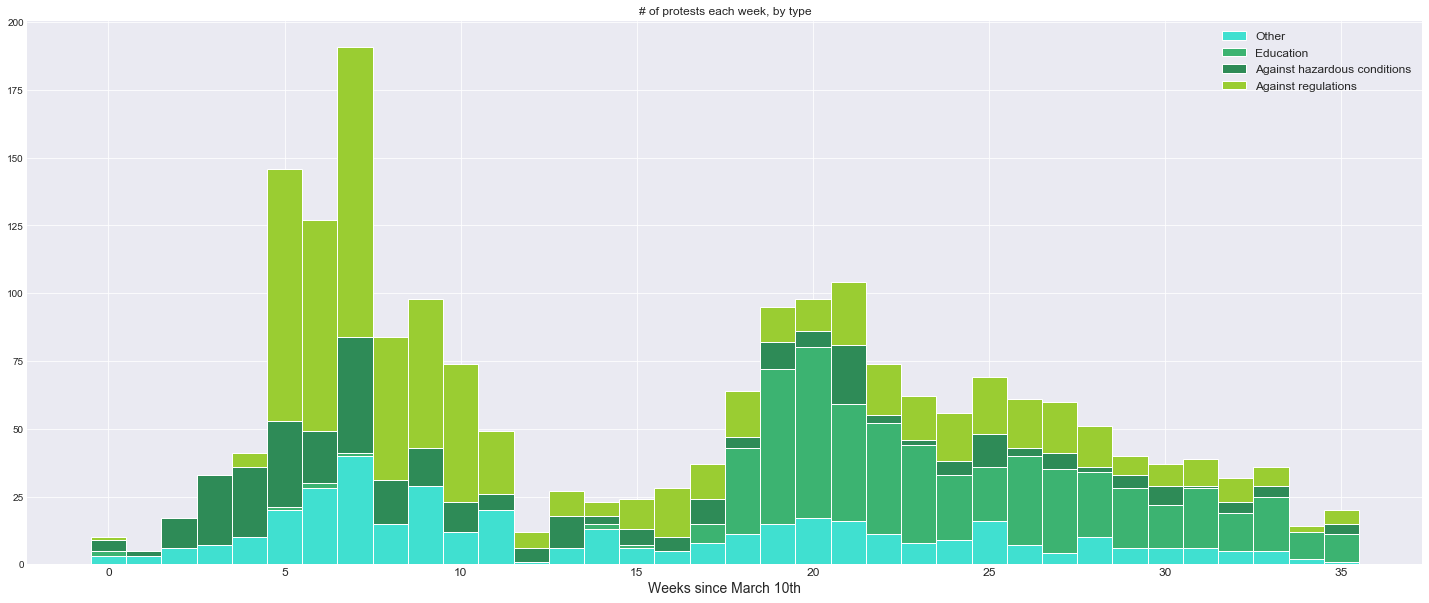

In [20]:
# Assigning each category colors
covidColors = {
    "Other":'turquoise',
    "Education":'mediumseagreen',
    "Against hazardous conditions":'seagreen',
    "Against regulations":'yellowgreen'
}

# Plotting
plt.clf()
fig, ax = plt.subplots()
botvals = pd.Series([0] * 36)

#Stacked Bar Chart
for i in range(len(covidEvent)):
    ax.bar(d4.index, d4[covidEvent[i]], bottom=botvals,
          label=covidEvent[i], color=covidColors[covidEvent[i]],
           width=1, edgecolor='white')
    botvals += d4[covidEvent[i]]
    
ax.legend(fontsize=12)
fig.set_size_inches(25, 10)
plt.title("# of protests each week, by type")
plt.xlabel("Weeks since March 10th", fontsize = 14)
plotxticks = [covidWeeks[i * 5] for i in range(8)]
plt.xticks([i*5 for i in range(8)], labels=plotxticks, fontsize=12)
plt.show()

In [24]:
covid[covid["Weeks Since"] > 30]["Source"]

35835    https://www.mtexpress.com/news/local-prep-prot...
35836    https://www.wabi.tv/2020/10/13/dozens-gather-t...
35837    https://myfox8.com/news/educators-rally-outsid...
35838    https://www.wtol.com/article/news/local/sylvan...
35839    https://www.montgomeryadvertiser.com/story/new...
                               ...                        
36919    https://wgntv.com/news/coronavirus/parents-at-...
36920    https://www.fox5dc.com/news/dc-school-nurses-p...
36937    https://6abc.com/covid-19-pa-bucks-county-penn...
36944    https://omaha.com/news/local/anti-mask-group-h...
36945    https://www.ksl.com/article/50049406/individua...
Name: Source, Length: 141, dtype: object

In [21]:
# can't forget our lovely presidential candidates, mcdonald trampoline and josephine bacon
# Creating an election subtable
electionset = (data["Date"] >= "2020-11-01") & (data["Event (General)"] == "Executive")
election = data[electionset]
election["President"] = election.apply(lambda row: "Trump" if ("For 45th" in row["Tags"]) else (
    "Biden" if ("Against 45th" in row["Tags"]) else (
    "Biden" if ("For 46th" in row["Tags"]) else "Other")), axis=1)
electionCount = pd.DataFrame(election["Date"].groupby(election["Date"].dt.to_period("D")).count())
electionCount.columns = ["Count"]

# Starting creation of DataFrame
president = ["Other", "Biden", "Trump"]
electionDays = [str(i)[5:] for i, v in electionCount.iterrows()]
electionCountList = [str(v["Count"]) for i, v in electionCount.iterrows()]
presidentIndex = {}
presidentIndexCount = {}
for i in range(len(president)):
    presidentIndex[president[i]]=i
    presidentIndexCount[i] = [0] * len(electionCountList)

for i, v in election.iterrows():
    dayStr = str(v["Date"].strftime("%Y-%m-%d"))[5:]
    i = electionDays.index(dayStr)
    j = presidentIndex[v["President"]]
    presidentIndexCount[j][i] += 1

# Construction of final dict
presidentDict = {
    "Day": electionDays,
    "Total Count":electionCountList
}
for i in president:
    presidentDict[i] = presidentIndexCount[presidentIndex[i]]

# Creation of DataFrame
d5 = pd.DataFrame(presidentDict)
d5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Day,Total Count,Other,Biden,Trump
0,11-01,35,0,6,29
1,11-02,4,2,0,2
2,11-03,10,2,3,5
3,11-04,8,0,3,5
4,11-05,16,1,0,15
5,11-06,18,0,2,16
6,11-07,117,0,59,58
7,11-08,24,0,10,14
8,11-09,2,0,0,2
9,11-11,2,0,0,2


<Figure size 432x288 with 0 Axes>

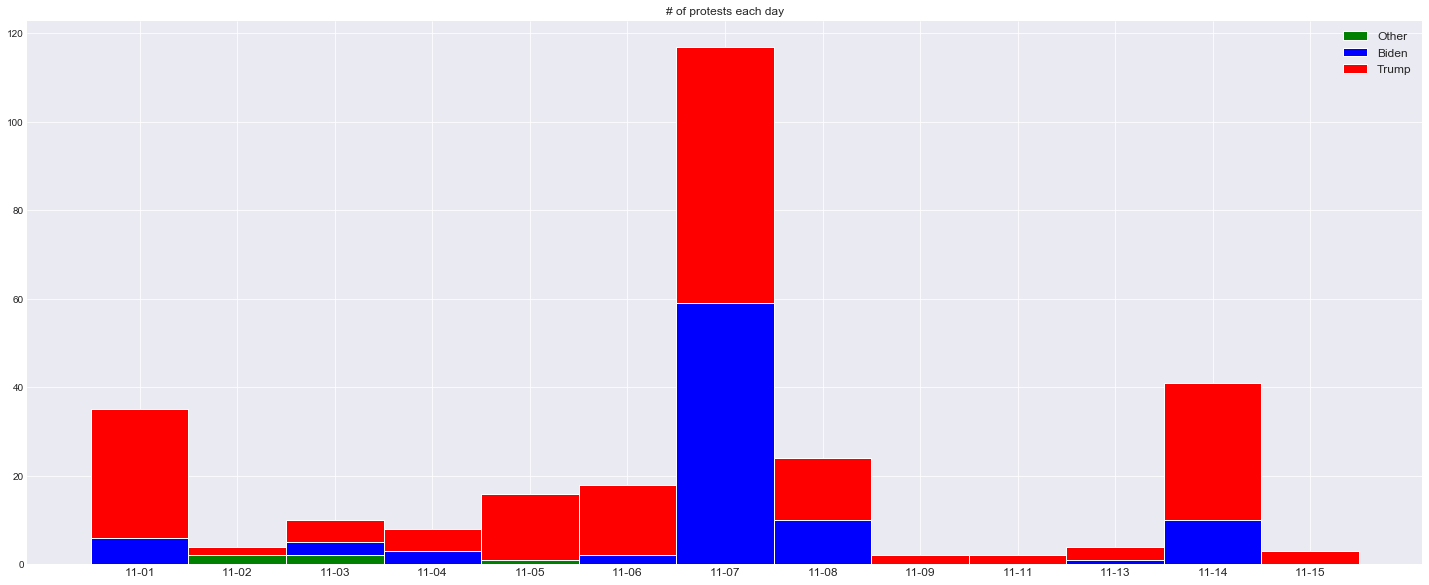

In [22]:
# Assign each president a color
presidentColors = {
    "Other":'green', 
    "Biden":"blue",
    "Trump":"red"
}

# Plotting
plt.clf()
fig, ax = plt.subplots()
botvals = pd.Series([0] * 13)

# Stacked Bar Chart
for i in range(len(president)):
    ax.bar(d5.index, d5[president[i]], bottom=botvals,
          label=president[i], color=presidentColors[president[i]],
          width=1, edgecolor='white')
    botvals += d5[president[i]]
ax.legend(fontsize=12)
fig.set_size_inches(25, 10)
plt.title("# of protests each day")
plotxticks = [electionDays[i] for i in range(13)]
plt.xticks([i for i in range(13)], labels=plotxticks, fontsize=12)
plt.show()

In [29]:
data[data["Event (General)"] == "Executive"]

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles,State,Event (General),COVID,COVID Reason
5,2017-01-19,"Washington, DC",NaN,Executive,Executive; Against 45th president,Yes,https://malvern-online.com/content/melee-near-...,1,DC,Executive,None,None
6,2017-01-19,"Washington, DC",NaN,Executive,Executive; For 45th president; Counter protest,No,https://malvern-online.com/content/melee-near-...,1,DC,Executive,None,None
8,2017-01-20,"Westlake Park, Seattle, WA",100.0,Executive,Executive; Against 45th president,Yes,https://www.seattletimes.com/seattle-news/nort...,1,WA,Executive,None,None
12,2017-01-20,"Salt Lake City, UT",1000.0,Executive (Inauguration March),Executive; Against 45th president,Yes,http://www.sltrib.com/home/4843395-155/about-1...,1,UT,Executive,None,None
13,2017-01-20,"Isla Vista, CA",500.0,Executive (Inauguration March),Executive; Against 45th president,Yes,https://www.edhat.com/site/tidbit.cfm?nid=180466,2,CA,Executive,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
36934,2020-11-14,"Bloomsburg, PA",20.0,Executive,Executive; For 45th president; Voting,No,https://www.pressenterpriseonline.com/daily/11...,1,PA,Executive,None,None
36940,2020-11-14,"State Capitol, Nashville, TN",200.0,Executive,Executive; For 45th president; Voting,No,https://www.wsmv.com/news/protesters-keep-voic...,1,TN,Executive,None,None
36941,2020-11-15,"Poway, CA",200.0,Executive,Executive; For 45th president; Voting,No,https://www.sandiegouniontribune.com/news/poli...,4,CA,Executive,None,None
36942,2020-11-15,"Rancho Mirage, CA",100.0,Executive,Executive; For 45th president; Voting,No,https://www.desertsun.com/story/news/2020/11/1...,1,CA,Executive,None,None


ok thats it im too tired to do more python is so much more tedious to code plots with than tableau lmao whatever